# Improved Loan Approval Perceptron with TensorFlow/Keras
Added a hidden layer, dropout for regularization, and early stopping to improve validation performance.

## 1. Import Libraries

In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


## 2. Create Synthetic Dataset

In [23]:
# Set random seed
tf.random.set_seed(42)
np.random.seed(42)
n_samples = 100
income = np.random.uniform(2, 20, n_samples)
credit_score = np.random.uniform(300, 850, n_samples)
num_loans = np.random.randint(0, 6, n_samples)
age = np.random.randint(21, 65, n_samples)
employment = np.random.randint(0, 2, n_samples)
labels = ((income > 5) & (credit_score > 600) & (employment == 1)).astype(int)
df = pd.DataFrame({
    'income': income,
    'credit_score': credit_score,
    'num_loans': num_loans,
    'age': age,
    'employment': employment,
    'approved': labels
})


## 3. Preprocess Data

In [24]:
X = df[['income','credit_score','num_loans','age','employment']].values
y = df['approved'].values
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X.astype(float))
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


## 4. Build and Compile Improved Model

In [25]:
model = Sequential([
    Dense(16, activation='relu', input_shape=(5,)),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model.summary()


/home/abhijit/miniconda3/envs/tf-env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 16)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113 (452.00 B)

 Trainable params: 113 (452.00 B)

 Non-trainable params: 0 (0.00 B)

## 5. Train with Early Stopping

In [26]:
es = EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True
)
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=8,
    validation_split=0.2,
    callbacks=[es],
    verbose=1
)


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.1496 - loss: 0.9782 - val_accuracy: 0.4375 - val_loss: 0.7767
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1893 - loss: 0.9285 - val_accuracy: 0.4375 - val_loss: 0.7597
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1496 - loss: 0.8980 - val_accuracy: 0.4375 - val_loss: 0.7455
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1858 - loss: 0.8835 - val_accuracy: 0.4375 - val_loss: 0.7341
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1777 - loss: 0.8238 - val_accuracy: 0.4375 - val_loss: 0.7248
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1894 - loss: 0.8060 - val_accuracy: 0.4375 - val_loss: 0.7181
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2373 - loss: 0.7804 - val_accuracy: 0.4375 - val_loss: 0.7135
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3114 - loss: 0.7679 - val_accuracy: 0.4375 - val_loss: 0.7107
Epoch 9

## 6. Evaluate Model

In [27]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {acc:.4f}')
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Test Loss: 0.7074, Test Accuracy: 0.4500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.50      0.62        18
           1       0.00      0.00      0.00         2

    accuracy                           0.45        20
   macro avg       0.41      0.25      0.31        20
weighted avg       0.74      0.45      0.56        20


Confusion Matrix:
[[9 9]
 [2 0]]


## 7. Plot Training History

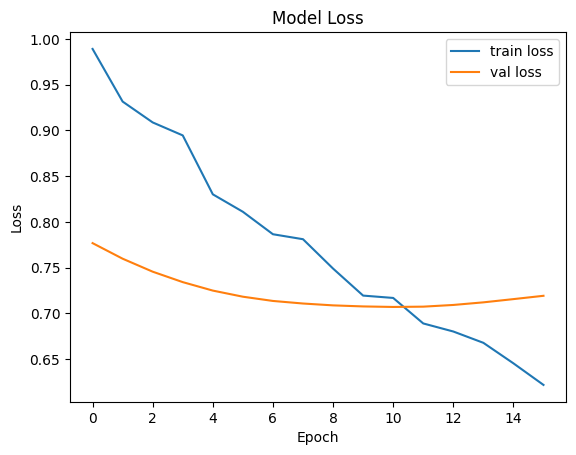

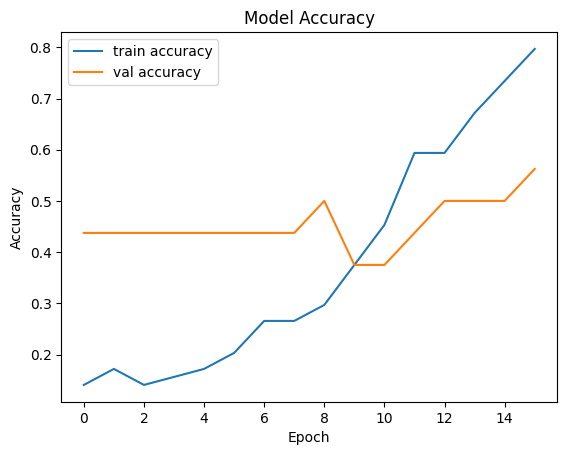

In [28]:
plt.figure()
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
